In [ ]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt

# Eigen Decomposition
We are going to take three vectors that will help us see the behaviour of our symmetric matrix

* Scaling - eigenvector with positive eigenvalue  
* Flipping - eigenvector with negative eigenvalue
* Direction change - means a candidate vector is not a eigenvector



## Local View

[Eigen] eigenvalue [ 2. -3.] and eigenvector [[1. 0.]
 [0. 1.]] of our symmetric matrix
[Av Output] Av_scale = [2. 0.] | Av_flip = [ 0. -3.] | Av_other = [ 2. -3.]


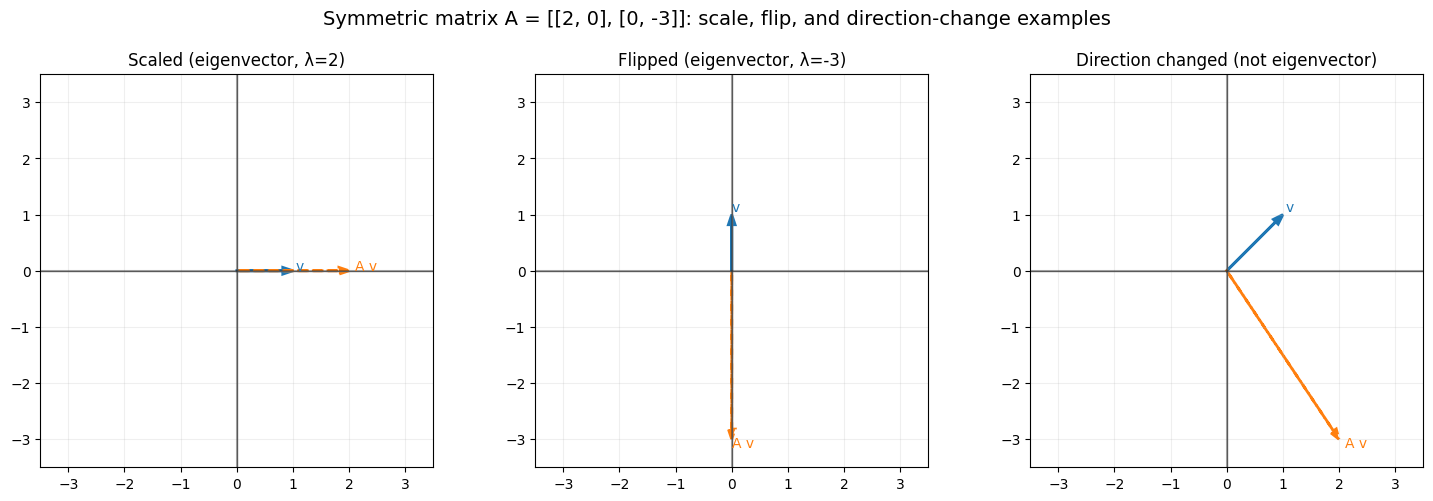

In [ ]:
# lets first take symmetric matrix
A = np.array([[2., 0.],
              [0., -3.]])

# the above matrix is symmetric, but lets do sanity check anyway
assert np.array_equal(A.T, A), "Matrix is not symmetric!"

# candidate vectors that will help us
v_scale = np.array([1., 0.])
v_flip  = np.array([0., 1.])
v_other = np.array([1., 1.])

# now lets do matrix vector multiplication
Av_scale = A @ v_scale
Av_flip  = A @ v_flip
Av_other = A @ v_other

# lets now compute eigenvalues and eigen vectors for our symmetric matrix
eigenvalue, eigenvec = np.linalg.eig(A)
print(f"[Eigen] eigenvalue {eigenvalue} and eigenvector {eigenvec} of our symmetric matrix")

print(f"[Av Output] Av_scale = {Av_scale} | Av_flip = {Av_flip} | Av_other = {Av_other}")

vectors = [(v_scale, Av_scale, "Scaled (eigenvector, λ=2)"),
           (v_flip,  Av_flip,  "Flipped (eigenvector, λ=-3)"),
           (v_other, Av_other, "Direction changed (not eigenvector)")]

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
limits = 3.5
for ax, (v, Av, title) in zip(axes, vectors):
  ax.set_xlim(-limits, limits)
  ax.set_ylim(-limits, limits)
  ax.axhline(0, color='gray', lw=1)
  ax.axvline(0, color='gray', lw=1)
  ax.set_aspect('equal', 'box')
  ax.grid(alpha=0.2)

  # original vector (solid)
  ax.arrow(0, 0, v[0], v[1], head_width=0.12, length_includes_head=True, color='C0', linewidth=2)
  ax.text(v[0]*1.05, v[1]*1.05, 'v', color='C0')
  # transformed vector (dashed)
  ax.arrow(0, 0, Av[0], Av[1], head_width=0.12, length_includes_head=True, color='C1', linewidth=2, linestyle='--')
  ax.text(Av[0]*1.05, Av[1]*1.05, 'A v', color='C1')

  # draw eigen axes for clarity (since A is diagonal here)
  ax.plot([-limits, limits], [0,0], color='k', alpha=0.3)  # x-axis
  ax.plot([0,0], [-limits, limits], color='k', alpha=0.3)  # y-axis

  ax.set_title(title)

fig.suptitle("Symmetric matrix A = [[2, 0], [0, -3]]: scale, flip, and direction-change examples", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Global View

In [ ]:
# lets take our matrix A and do diagonalization
A = np.array([[3, 0], [0, 0.5]])
print(f"our criminal matrix ---> {A}")

# now lets do diagonalization, first find eigenvalues and eigenvectors
eigenvalues , eigenvectors = np.linalg.eig(A)
# the equation of diagonalization P.inverse @ D @ P
D = np.diag(eigenvalues)
print(f"Eigenvalues -- {eigenvalues} found")
print(f"Diagonal matrix >> D -- {D}")
print(f"Eigenvectors >> P -- {eigenvectors}")

# now we also P inverse
P_inv = np.linalg.inv(eigenvectors)

# lets do quick sanity check to see we get back our matrix A
A_dash = eigenvectors @ D @ P_inv
print(f"Reconstructed A (P @ D @ P_inv):\n{A_dash}")
is_correct = np.allclose(A, A_dash)
print(f"Verification successful: {is_correct}\n")

# the last step would be to see how this transforms our input vectors
input_vec1 = np.array([[1.0],[1.0]])
input_vec2 = np.array([[-1.0], [1.0]])

# now we transform the input vectors with matrix A
input_vec1_transformed = A @ input_vec1
input_vec2_transformed = A @ input_vec2

print(f"Original input vector 1: {input_vec1.ravel()}")
print(f"Transformed vector 1 (Avec1): {input_vec1_transformed.ravel()}")
print("-" * 20)
print(f"Original input vector 2: {input_vec2.ravel()}")
print(f"Transformed vector 2 (Avec2): {input_vec2_transformed.ravel()}\n")

our criminal matrix ---> [[3.  0. ]
 [0.  0.5]]
Eigenvalues -- [3.  0.5] found
Diagonal matrix >> D -- [[3.  0. ]
 [0.  0.5]]
Eigenvectors >> P -- [[1. 0.]
 [0. 1.]]
Reconstructed A (P @ D @ P_inv):
[[3.  0. ]
 [0.  0.5]]
Verification successful: True

Original input vector 1: [1. 1.]
Transformed vector 1 (Avec1): [3.  0.5]
--------------------
Original input vector 2: [-1.  1.]
Transformed vector 2 (Avec2): [-3.   0.5]



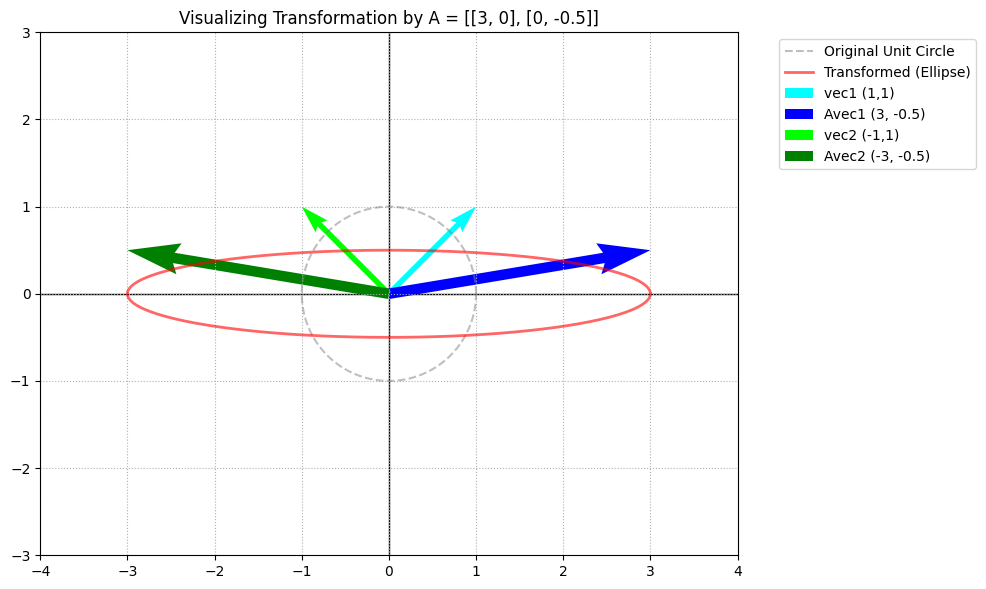

In [ ]:
theta = np.linspace(0, 2*np.pi, 200)
circle_points = np.vstack([np.cos(theta), np.sin(theta)])

# 2. Apply matrix A to create the ellipse points
transformed_points = A @ circle_points

# --- PLOTTING ---
fig, ax = plt.subplots(figsize=(10, 8))

# 1. Plot Shapes
# Original circle (dashed grey)
ax.plot(circle_points[0, :], circle_points[1, :], 'grey', linestyle='--', alpha=0.5, label='Original Unit Circle')
# Transformed ellipse (solid red)
ax.plot(transformed_points[0, :], transformed_points[1, :], 'r-', linewidth=2, alpha=0.6, label='Transformed (Ellipse)')


# 2. Plot Vectors using quiver (arrows)
# Helper function to plot vectors easily
def plot_vector(vec, trans_vec, color_orig, color_trans, label_orig, label_trans):
    # Original vector (lighter color, thinner)
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
              color=color_orig, width=0.008, label=label_orig)
    # Transformed vector (darker color, thicker)
    ax.quiver(0, 0, trans_vec[0], trans_vec[1], angles='xy', scale_units='xy', scale=1,
              color=color_trans, width=0.015, label=label_trans)

# Plot u pair (Blues)
plot_vector(input_vec1, input_vec1_transformed, 'cyan', 'blue', 'vec1 (1,1)', 'Avec1 (3, -0.5)')

# Plot w pair (Greens)
plot_vector(input_vec2, input_vec2_transformed, 'lime', 'green', 'vec2 (-1,1)', 'Avec2 (-3, -0.5)')


# --- GRAPH SETUP ---
ax.axhline(y=0, color='k', linewidth=1, zorder=0)
ax.axvline(x=0, color='k', linewidth=1, zorder=0)
ax.grid(True, linestyle=':')
# Important: Ensure aspect ratio is equal so circles look circular
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_title(f"Visualizing Transformation by A = [[3, 0], [0, -0.5]]")
# Place legend outside the plot area so it doesn't cover data
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()